In [1]:
!pip install keras


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data() #loaddata() ot only imports the data but also separates it into training and testing sets

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

[1]


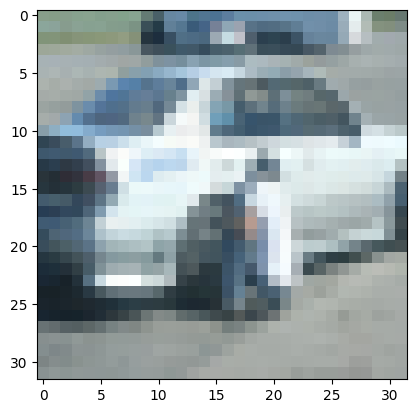

In [8]:
i = 30009
plt.imshow(X_train[i])
print(y_train[i])


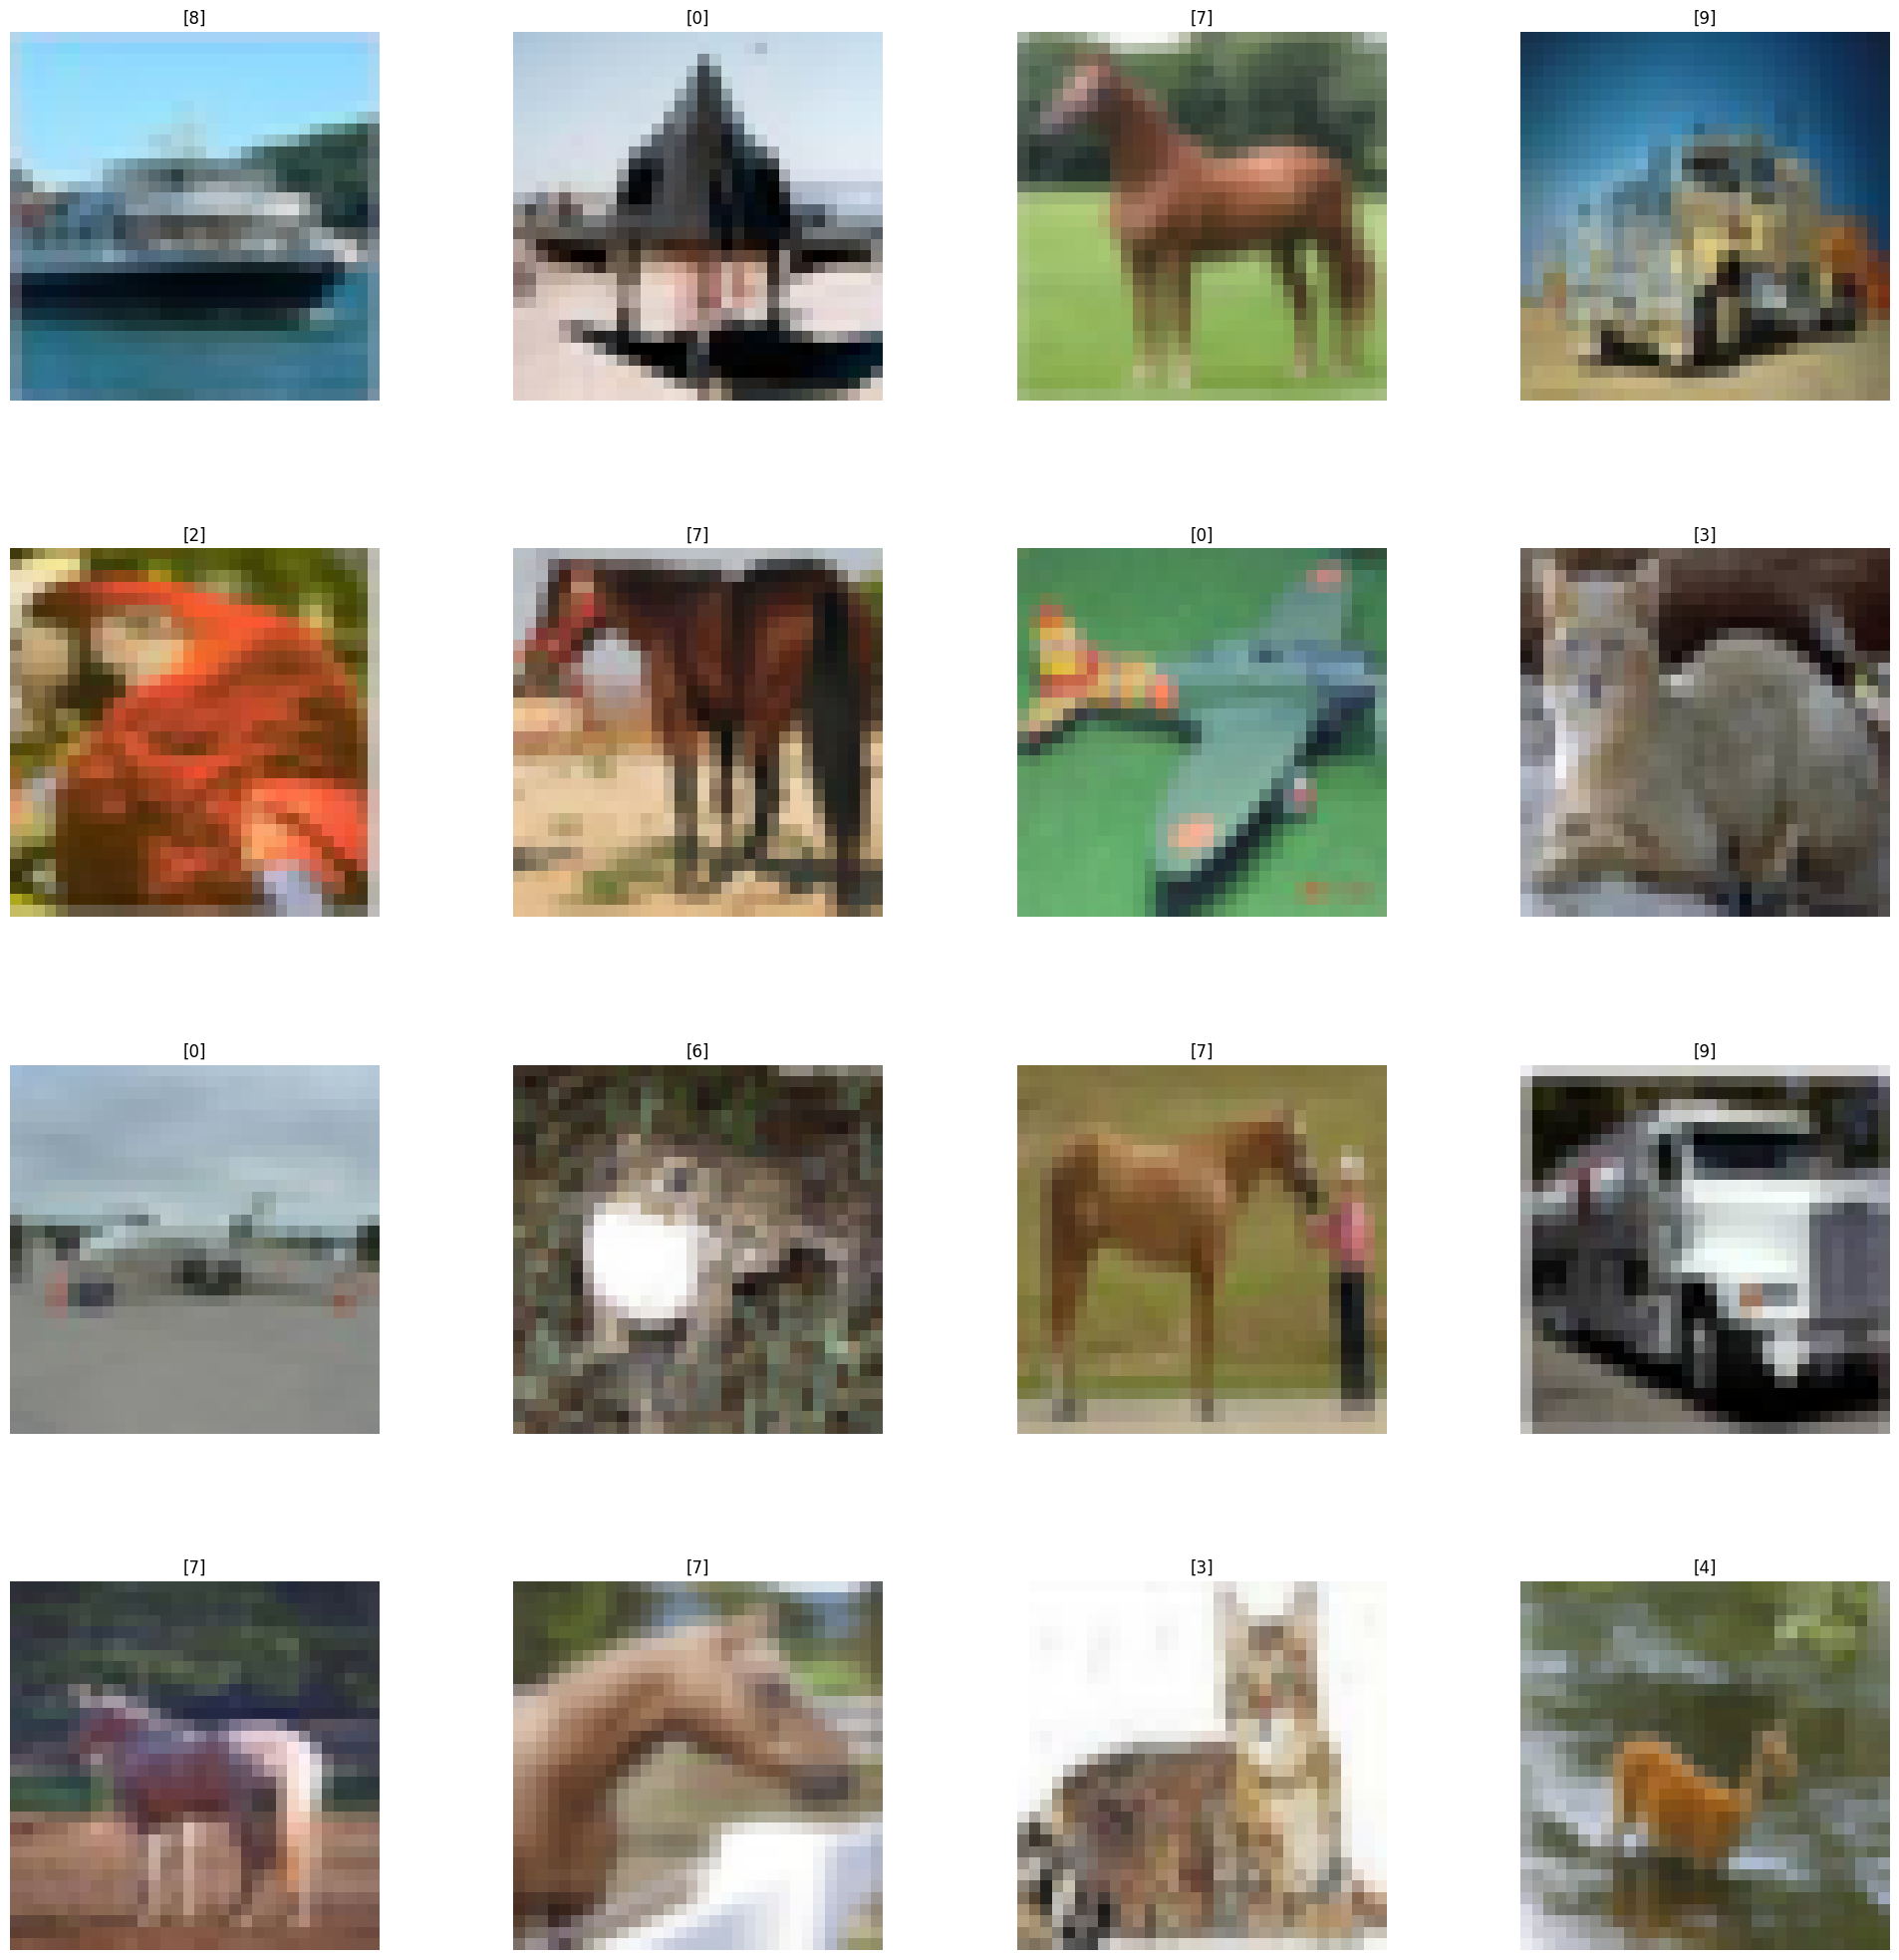

In [9]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)


In [10]:
n_training

50000

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
number_cat = 10

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [17]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [18]:
X_train.shape

(50000, 32, 32, 3)

In [19]:
Input_shape = X_train.shape[1:]

In [20]:
Input_shape

(32, 32, 3)

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [22]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [24]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])


In [25]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 1, shuffle = True)

1563/1563 [==============================] - 147s 93ms/step - loss: 2.2624 - accuracy: 0.3004


In [26]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 7s 22ms/step - loss: 1.6015 - accuracy: 0.4230
Test Accuracy: 0.4230000078678131


In [28]:
predicted_probabilities = cnn_model.predict(X_test)


predicted_classes = np.argmax(predicted_probabilities, axis=1)

313/313 [==============================] - 7s 22ms/step


In [29]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [30]:
y_test = y_test.argmax(1)

In [31]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

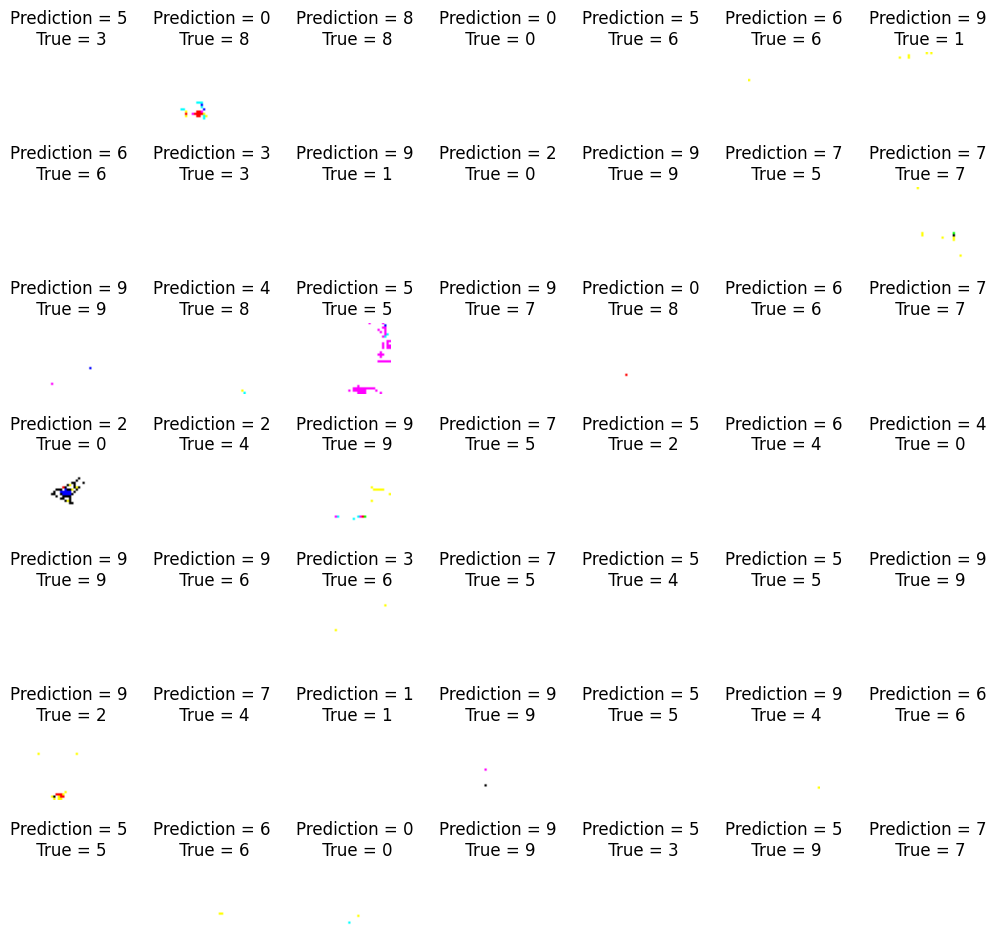

In [32]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

<Axes: >

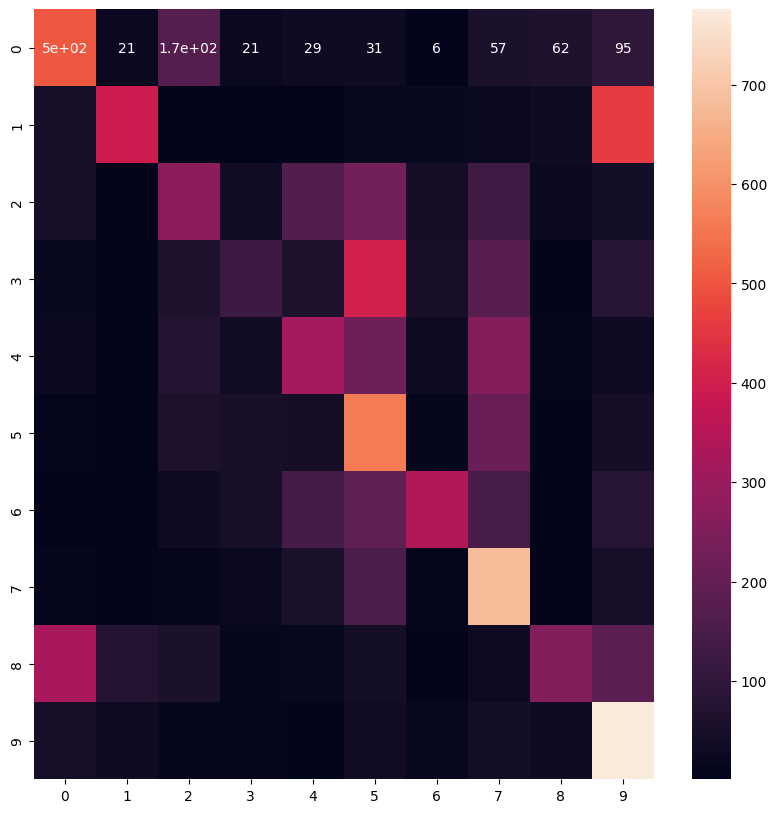

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [34]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

C:\Users\91790\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [36]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [37]:
X_train.shape

(50000, 32, 32, 3)

In [38]:
n = 8 
X_train_sample = X_train[:n]

In [39]:
X_train_sample.shape

(8, 32, 32, 3)

In [40]:
from keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,3))


dataget_train.fit(X_train_sample)

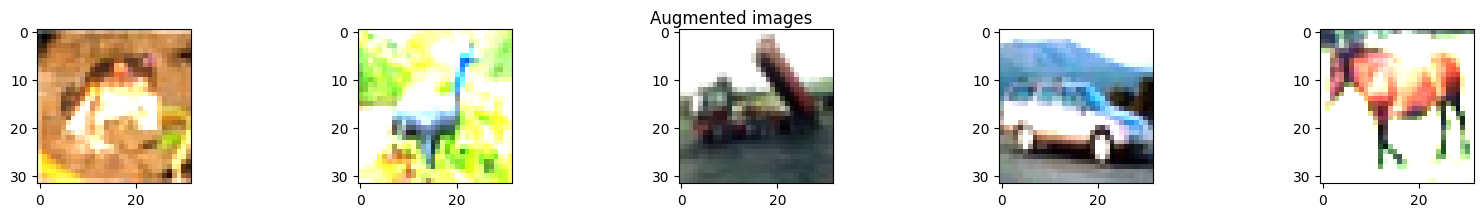

In [45]:


from keras.preprocessing import image

fig = plt.figure(figsize=(20, 2))
n = 5  # Number of augmented images to display

# Assuming X_train_sample is your training data
for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
    for i in range(n):
        ax = fig.add_subplot(1, n, i + 1)
        
        # Convert image data to a PIL Image
        img = image.array_to_img(x_batch[i])
        
        # Display the image
        ax.imshow(img)
    
    fig.suptitle('Augmented images')
    plt.show()
    break


In [46]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [47]:
datagen.fit(X_train)

In [48]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

C:\Users\91790\AppData\Local\Temp\ipykernel_15116\25322486.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)


Epoch 1/2
1563/1563 [==============================] - 157s 100ms/step - loss: 3537271018433282048.0000 - accuracy: 0.2133
Epoch 2/2
1563/1563 [==============================] - 149s 95ms/step - loss: 2740122025056287064064.0000 - accuracy: 0.0115


In [ ]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

In [ ]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)